In [5]:
import pandas as pd
bank_df = pd.read_csv('bank_prep.csv', sep = ',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
1,36,0,265,1,1,5,348,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
2,25,0,-7,1,0,5,365,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
3,53,0,-3,0,0,5,1666,1,-1,0,...,False,False,False,False,False,False,True,False,False,False
4,24,0,-103,1,1,5,145,1,-1,0,...,False,False,False,False,False,False,True,False,False,False


In [6]:
from sklearn.preprocessing import MinMaxScaler

bank_df = bank_df.drop('y',axis = 1)

mc = MinMaxScaler()
mc.fit(bank_df)
bank_df_sc = pd.DataFrame(mc.transform(bank_df), columns = bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.549296,0.0,0.064555,1.0,0.0,0.133333,0.077540,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.239437,0.0,0.042335,1.0,1.0,0.133333,0.103387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.084507,0.0,0.039116,1.0,0.0,0.133333,0.108437,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.478873,0.0,0.039164,0.0,0.0,0.133333,0.494949,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.070423,0.0,0.037981,1.0,1.0,0.133333,0.043078,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(bank_df)

bank_df_sc = pd.DataFrame(sc.transform(bank_df), columns = bank_df.columns)
bank_df_sc.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1.647908,-0.137148,0.250618,0.876711,-0.444540,-1.275382,-0.006613,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
1,-0.443424,-0.137148,-0.362335,0.876711,2.249514,-1.275382,0.317659,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
2,-1.489090,-0.137148,-0.451112,0.876711,-0.444540,-1.275382,0.381022,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
3,1.172605,-0.137148,-0.449807,-1.140627,-0.444540,-1.275382,5.230180,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073
4,-1.584150,-0.137148,-0.482445,0.876711,2.249514,-1.275382,-0.438974,-0.574193,-0.418664,-0.310149,...,-0.063679,-0.267818,-0.167406,-0.43473,-0.351657,-0.100262,1.510337,-0.320275,-0.134949,-0.112073


In [11]:
from sklearn.decomposition import PCA
pca = PCA(0.80)
bank_df_pca = pca.fit_transform(bank_df_sc)

print(pca.n_components_)
print(bank_df_pca.shape)

18
(6933, 18)


In [12]:
y = pd.read_csv('bank_prep.csv', sep=',')['y']

bank_df_pca = pd.DataFrame(bank_df_pca)
bank_df_pca['y'] = y

print(bank_df_pca.shape)

(6933, 19)


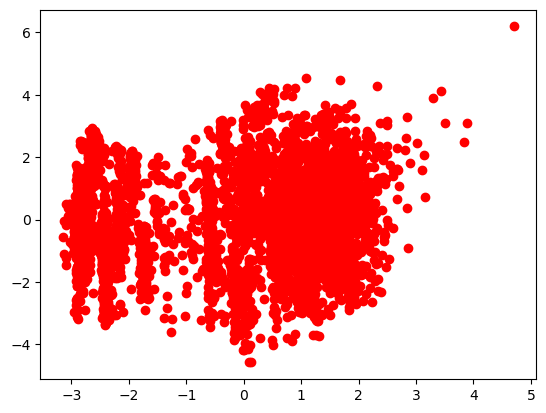

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y',axis = 1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c = 'red', label = 0)

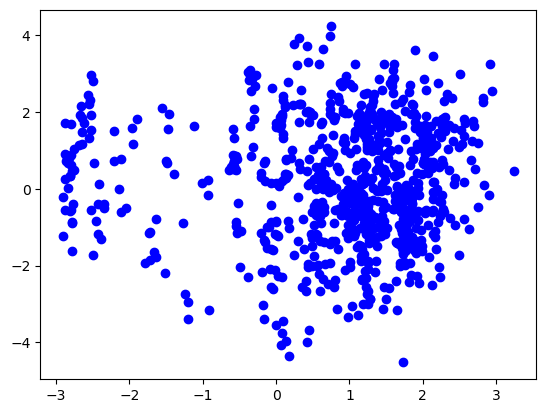

In [14]:
bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis = 1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label = 1)

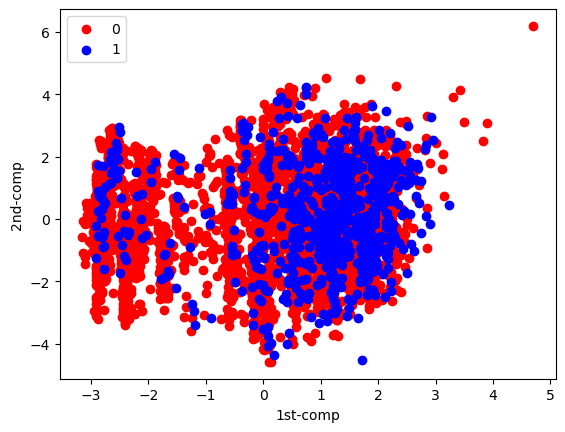

In [16]:
bank_df_pca_0 = bank_df_pca[bank_df_pca['y'] == 0]
bank_df_pca_0 = bank_df_pca_0.drop('y',axis = 1)
plt.scatter(bank_df_pca_0[0], bank_df_pca_0[1], c = 'red', label = 0)

bank_df_pca_1 = bank_df_pca[bank_df_pca['y'] == 1]
bank_df_pca_1 = bank_df_pca_1.drop('y', axis = 1)
plt.scatter(bank_df_pca_1[0], bank_df_pca_1[1], c='blue', label = 1)

plt.legend()
plt.xlabel('1st-comp')
plt.ylabel('2nd-comp')
plt.show()